<a href="https://www.kaggle.com/code/zukhrakhongulomova/keras-tutorial?scriptVersionId=159719240" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction to Keras

In [1]:
%%capture --no-display
!pip install keras --upgrade
!pip install tensorflow

## Notebook Imports

In [2]:
from keras import models
from keras import layers
import numpy as np
from random import randint
from sklearn.utils import shuffle 
from sklearn.preprocessing import MinMaxScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_labels = []
train_samples = []

### Example

* In a clinical trial with 2100 participants from 13 to 100
* Half under 65 and half 65 or older
* 95% of the older group had side effects
* 95% of the younger group had no side effects

In [4]:
for i in range(50):
    # ~5% of younger individuals who did experience side effect
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # ~5% of older individuals who did not experience side effect
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    # ~95% of younger individuals who did not experience side effect
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # ~95% of older individuals who did experience side effect
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [7]:
scaled_train_samples

array([[0.62068966],
       [0.47126437],
       [0.85057471],
       ...,
       [0.88505747],
       [0.32183908],
       [0.75862069]])

### Simple tf.keras Sequential Model

### Notebook Imports

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dense 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.metrics import categorical_crossentropy 

In [9]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('Num GPUs Available:', len(physical_devices)) 

Num GPUs Available: 1


In [10]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, 
          batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 3s - loss: 0.6822 - accuracy: 0.5746 - val_loss: 0.6758 - val_accuracy: 0.6429 - 3s/epoch - 16ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6627 - accuracy: 0.7243 - val_loss: 0.6554 - val_accuracy: 0.7762 - 421ms/epoch - 2ms/step
Epoch 3/30
189/189 - 0s - loss: 0.6428 - accuracy: 0.7720 - val_loss: 0.6366 - val_accuracy: 0.8048 - 417ms/epoch - 2ms/step
Epoch 4/30
189/189 - 0s - loss: 0.6227 - accuracy: 0.8026 - val_loss: 0.6168 - val_accuracy: 0.8095 - 411ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.6007 - accuracy: 0.8095 - val_loss: 0.5948 - val_accuracy: 0.8333 - 419ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.5765 - accuracy: 0.8228 - val_loss: 0.5705 - val_accuracy: 0.8476 - 424ms/epoch - 2ms/step
Epoch 7/30
189/189 - 0s - loss: 0.5500 - accuracy: 0.8275 - val_loss: 0.5441 - val_accuracy: 0.8476 - 425ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.5223 - accuracy: 0.8550 - val_loss: 0.5172 - val_accuracy: 0.8524 - 416ms/epoch - 2ms/step
Ep

## Preprocess Test Data

In [14]:
test_labels = []
test_samples = []

In [15]:
for i in range(10):
    # ~5% of younger individuals who did experience side effect
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # ~5% of older individuals who did not experience side effect
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    # ~95% of younger individuals who did not experience side effect
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # ~95% of older individuals who did experience side effect
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [16]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

## Predict

In [18]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [19]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [20]:
rounded_predictions

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,

## Confusion Matrix

In [21]:
%matplotlib inline 
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [22]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [23]:
def plot_confusion_matrix(cm, classes, normalize=False, 
                          title="Confusion Matrix", cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion Matrix, without normalization")
        
    print(cm)
    
    tresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center',
                color='white' if cm[i, j] > tresh else "black")
        
        plt.tight_layout()
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")

Confusion Matrix, without normalization
[[192  18]
 [ 10 200]]


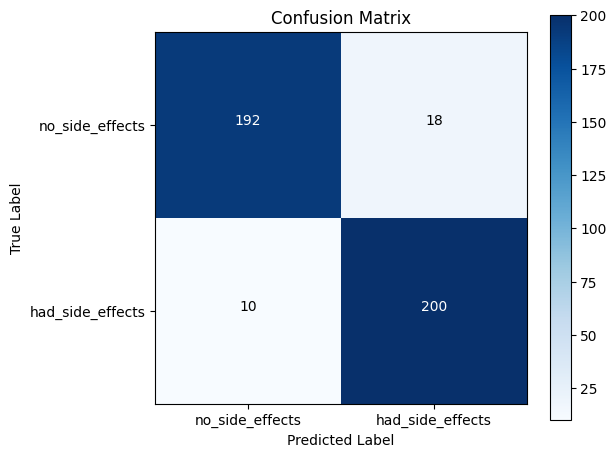

In [24]:
plot_labels = ["no_side_effects", "had_side_effects"]
plot_confusion_matrix(cm=cm, classes=plot_labels)

## Save and Load a Model 

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
import os.path

if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**This save function saves:**

* The architecture of the model, allowing to re-create the model.
* The weights of the model.
* The training configuration (loss, optimizer).
* The state of the optimizer, allowing to resume training exactly where you left off.

In [27]:
from tensorflow.keras.models import load_model, model_from_json

new_model = load_model('models/medical_trial_model.h5')

In [28]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# new_model.get_weights()

In [30]:
new_model.optimizer

### 2. model.to_json()

In [31]:
# save as JSON
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class

In [32]:
model_architecture = model_from_json(json_string)
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
